In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import gender_guesser.detector as gender


In [2]:
df = pd.read_csv('DATASET/Depression_Dataset.csv')
df.head()

Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption  ... Sleep Patterns  \
0        Unemployed   26265.67            Moderate  ...           Fair   
1          Employed   42710.36                High  ...           Fair   
2          Employed  125332.79                 Low  ...           Good   
3        Unemployed    9992.78            Moderate  ...           Poor   
4        Unemployed    8595.08                 Low  ...           Fair   

  History of Mental Illness History of Substance Abuse  \
0                       Yes                         No   
1                       Yes                         No   
2                        No                         No   
3                        No                         No   
4                       Yes                         No   

  Family History of Depression Chronic Medical Conditions  Gender Risk Score  \
0                          Yes                        Yes  Female       11.5   
1                           No                        Yes  Female        9.0   
2                          Yes                         No  Female        5.0   
3                           No                         No    Male        7.5   
4                          Yes                        Yes    Male       12.0   

              Depression Status             Age Group Income Bracket  
0                           Yes        Adults (30-39)         Medium  
1  More Chances to be Depressed   Pre-Seniors (50-59)         Medium  
2   Low Chances to be Depressed       Elderly (70-79)      Very High  
3  More Chances to be Depressed   Pre-Seniors (50-59)            Low  
4                           Yes  Young Adults (18-29)            Low  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [4]:
df['Gender'].value_counts()


Gender
Male       208087
Female     201912
Unknown      3769
Name: count, dtype: int64

In [5]:
df.describe()

Age  Number of Children         Income     Risk Score
count  413768.000000       413768.000000  413768.000000  413768.000000
mean       49.000713            1.298972   50661.707971       6.827346
std        18.158759            1.237054   40624.100565       2.870956
min        18.000000            0.000000       0.410000       0.500000
25%        33.000000            0.000000   21001.030000       4.500000
50%        49.000000            1.000000   37520.135000       6.500000
75%        65.000000            2.000000   76616.300000       9.000000
max        80.000000            4.000000  209995.220000      18.000000

# DEFINING CRITERIA TO CALCULATE THE RISK SCORE OF THE DEPRESSION ON THE BASIS OF SELECTED COLUMNS 

In [6]:
# Define scoring function
def calculate_risk(row):
    score = 0

    # History of Mental Illness
    score += 2 if row['History of Mental Illness'] == 'Yes' else 0
    
    # History of Substance Abuse
    score += 2 if row['History of Substance Abuse'] == 'Yes' else 0
    
    # Family History of Depression
    score += 2 if row['Family History of Depression'] == 'Yes' else 0
    
    # Smoking Status
    if row['Smoking Status'] == 'Current Smoker':
        score += 1
    elif row['Smoking Status'] == 'Former Smoker':
        score += 0.5
    
    # Alcohol Consumption
    if row['Alcohol Consumption'] == 'High':
        score += 2
    elif row['Alcohol Consumption'] == 'Moderate':
        score += 1
    elif row['Alcohol Consumption'] == 'Low':
        score += 0.5
    
    # Dietary Habits
    score += 2 if row['Dietary Habits'] == 'Poor' else 1 if row['Dietary Habits'] == 'Average' else 0
    
    # Sleep Patterns
    score += 2 if row['Sleep Patterns'] == 'Irregular' else 0
    
    # Physical Activity Level
    score += 2 if row['Physical Activity Level'] == 'Low' else 1 if row['Physical Activity Level'] == 'Moderate' else 0
    
    # Marital Status
    if row['Marital Status'] in ['Divorced', 'Single', 'Widowed']:
        score += 1
    
    # Education Level
    if row['Education Level'] in ['High School']:
        score += 0.5
    elif row['Education Level'] in ['Less than high school']:
        score += 1
    
    # Number of Children
    score += 1 if row['Number of Children'] > 3 else 0.5 if row['Number of Children'] in [1, 2, 3] else 0
    
    # Employment Status
    score += 2 if row['Employment Status'] == 'Unemployed' else 1 if row['Employment Status'] == 'Part-time' else 0
    
    # Income
    if row['Income'] < 20000:
        score += 2
    elif row['Income'] < 50000:
        score += 1
    
    # Gender
    if row['Gender'] == 'Female':
        score += 1
    
    # Chronic Medical Conditions
    score += 2 if row['Chronic Medical Conditions'] == 'Yes' else 0
    
    return score

# Apply function to calculate risk scores
df['Risk Score'] = df.apply(calculate_risk, axis=1)

# Define depression classification based on risk score
def classify_depression(score):
    if score > 10:
        return 'Yes'  # High likelihood of depression
    elif score > 7:
        return 'More Chances to be Depressed'  # Moderate likelihood of depression
    elif score > 4:
        return 'Low Chances to be Depressed'  # Low likelihood of depression
    else:
        return 'No'  # Very low likelihood of depression

df['Depression Status'] = df['Risk Score'].apply(classify_depression)


df[['Name', 'Risk Score', 'Depression Status']]

Name  Risk Score             Depression Status
0       Christine Barker        11.5                           Yes
1       Jacqueline Lewis         9.0  More Chances to be Depressed
2         Shannon Church         5.0   Low Chances to be Depressed
3         Charles Jordan         7.5  More Chances to be Depressed
4           Michael Rich        12.0                           Yes
...                  ...         ...                           ...
413763       Sean Miller         1.5                            No
413764   Christina Brown         8.5  More Chances to be Depressed
413765   Matthew Jenkins         5.0   Low Chances to be Depressed
413766     Gary Faulkner         6.5   Low Chances to be Depressed
413767    Joseph Johnson         5.0   Low Chances to be Depressed

[413768 rows x 3 columns]

In [7]:
df.head()

Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption  ... Sleep Patterns  \
0        Unemployed   26265.67            Moderate  ...           Fair   
1          Employed   42710.36                High  ...           Fair   
2          Employed  125332.79                 Low  ...           Good   
3        Unemployed    9992.78            Moderate  ...           Poor   
4        Unemployed    8595.08                 Low  ...           Fair   

  History of Mental Illness History of Substance Abuse  \
0                       Yes                         No   
1                       Yes                         No   
2                        No                         No   
3                        No                         No   
4                       Yes                         No   

  Family History of Depression Chronic Medical Conditions  Gender Risk Score  \
0                          Yes                        Yes  Female       11.5   
1                           No                        Yes  Female        9.0   
2                          Yes                         No  Female        5.0   
3                           No                         No    Male        7.5   
4                          Yes                        Yes    Male       12.0   

              Depression Status             Age Group Income Bracket  
0                           Yes        Adults (30-39)         Medium  
1  More Chances to be Depressed   Pre-Seniors (50-59)         Medium  
2   Low Chances to be Depressed       Elderly (70-79)      Very High  
3  More Chances to be Depressed   Pre-Seniors (50-59)            Low  
4                           Yes  Young Adults (18-29)            Low  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

# introducing more columns related to age gropus and income bracets to make analysis simple 

In [9]:
# Create Age Groups with Descriptive Labels
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    'Children (0-17)', 
    'Young Adults (18-29)', 
    'Adults (30-39)', 
    'Middle-aged Adults (40-49)', 
    'Pre-Seniors (50-59)', 
    'Seniors (60-69)', 
    'Elderly (70-79)', 
    'Very Elderly (80-89)', 
    'Centenarians (90+)'
]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create Income Brackets
income_bins = [0, 20000, 50000, 100000, float('inf')]
income_labels = ['Low', 'Medium', 'High', 'Very High']
df['Income Bracket'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

# Display the first few rows to check the new columns
df[['Age', 'Age Group', 'Income', 'Income Bracket']].head()

Age             Age Group     Income Income Bracket
0   31        Adults (30-39)   26265.67         Medium
1   55   Pre-Seniors (50-59)   42710.36         Medium
2   78       Elderly (70-79)  125332.79      Very High
3   58   Pre-Seniors (50-59)    9992.78            Low
4   18  Young Adults (18-29)    8595.08            Low

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Name                          413768 non-null  object  
 1   Age                           413768 non-null  int64   
 2   Marital Status                413768 non-null  object  
 3   Education Level               413768 non-null  object  
 4   Number of Children            413768 non-null  int64   
 5   Smoking Status                413768 non-null  object  
 6   Physical Activity Level       413768 non-null  object  
 7   Employment Status             413768 non-null  object  
 8   Income                        413768 non-null  float64 
 9   Alcohol Consumption           413768 non-null  object  
 10  Dietary Habits                413768 non-null  object  
 11  Sleep Patterns                413768 non-null  object  
 12  History of Mental Illness     

# Converting all the object dtype columns excluding Name column into category because it is more efficient in memory usage 


In [11]:

# Exclude Name and numeric columns from conversion
columns_to_convert = [col for col in df.columns if df[col].dtype == 'object' and col not in ['Name']]

# Convert selected columns to category dtype
for col in columns_to_convert:
    df[col] = df[col].astype('category')

# Check the updated dtypes
df.dtypes

Name                              object
Age                                int64
Marital Status                  category
Education Level                 category
Number of Children                 int64
Smoking Status                  category
Physical Activity Level         category
Employment Status               category
Income                           float64
Alcohol Consumption             category
Dietary Habits                  category
Sleep Patterns                  category
History of Mental Illness       category
History of Substance Abuse      category
Family History of Depression    category
Chronic Medical Conditions      category
Gender                          category
Risk Score                       float64
Depression Status               category
Age Group                       category
Income Bracket                  category
dtype: object

# You can check the diffrence in memory usage : previously it is around 60 MB+ and mow it is only around 25 MB only

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Name                          413768 non-null  object  
 1   Age                           413768 non-null  int64   
 2   Marital Status                413768 non-null  category
 3   Education Level               413768 non-null  category
 4   Number of Children            413768 non-null  int64   
 5   Smoking Status                413768 non-null  category
 6   Physical Activity Level       413768 non-null  category
 7   Employment Status             413768 non-null  category
 8   Income                        413768 non-null  float64 
 9   Alcohol Consumption           413768 non-null  category
 10  Dietary Habits                413768 non-null  category
 11  Sleep Patterns                413768 non-null  category
 12  History of Mental Illness     

#  HERE WE HAVE ANLYZE THAT HOW MULTIPLE FACTORS AFFECT DEPRESSION STATUS INDIVIDUALLY

# Age Group Analysis
## Compare Depression Risk by Age Group


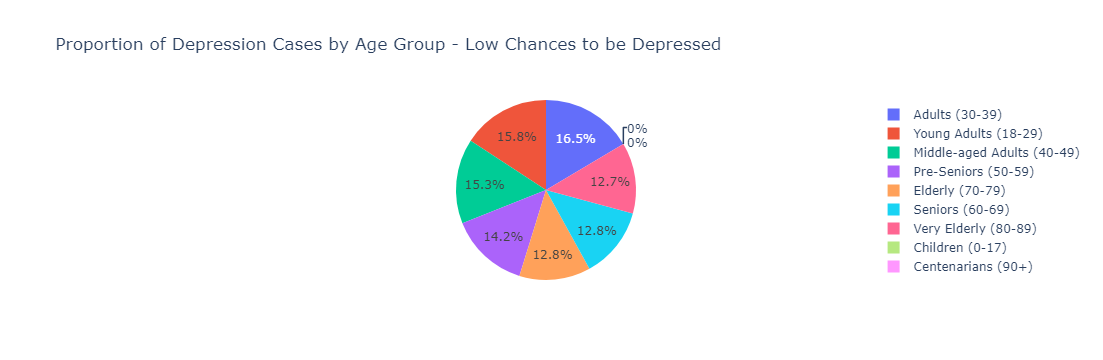

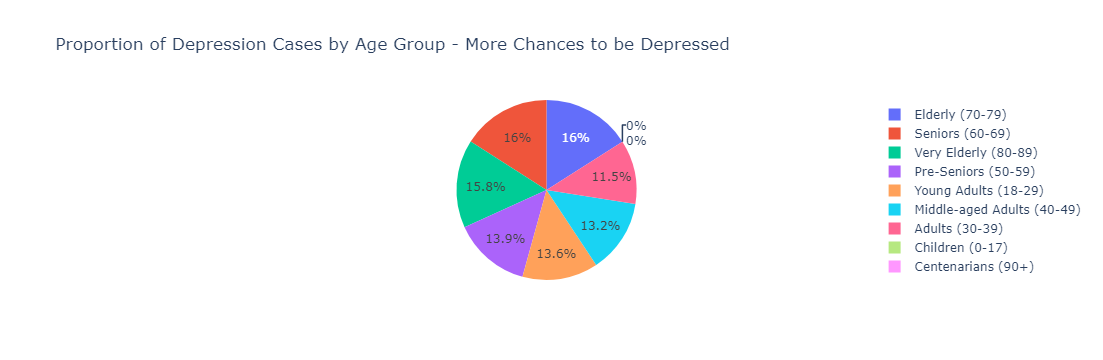

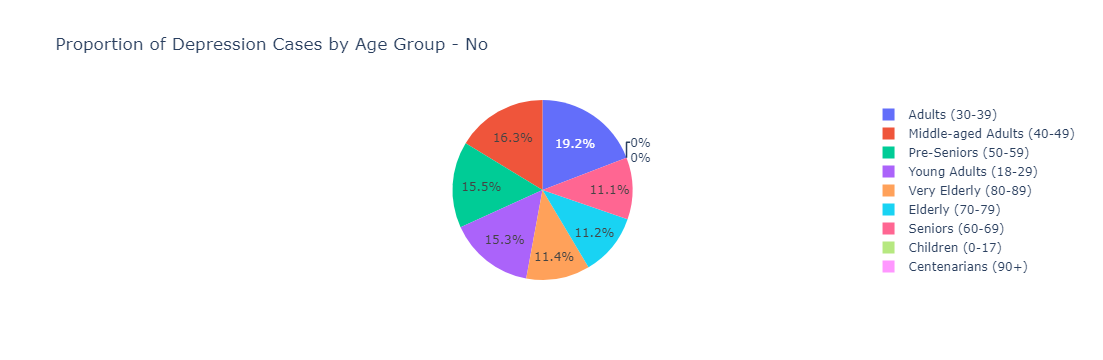

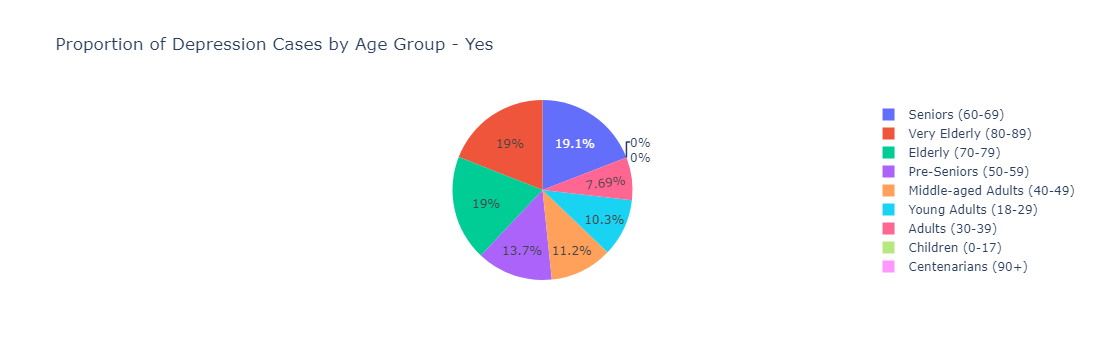

In [13]:
# Calculate proportion of depression cases by age group
age_group_analysis = df.groupby('Age Group', observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Age Group Analysis
for status in age_group_analysis.columns:
    fig = px.pie(age_group_analysis, names=age_group_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Age Group - {status}')
    fig.show()

# Gender Analysis
## Gender Comparison

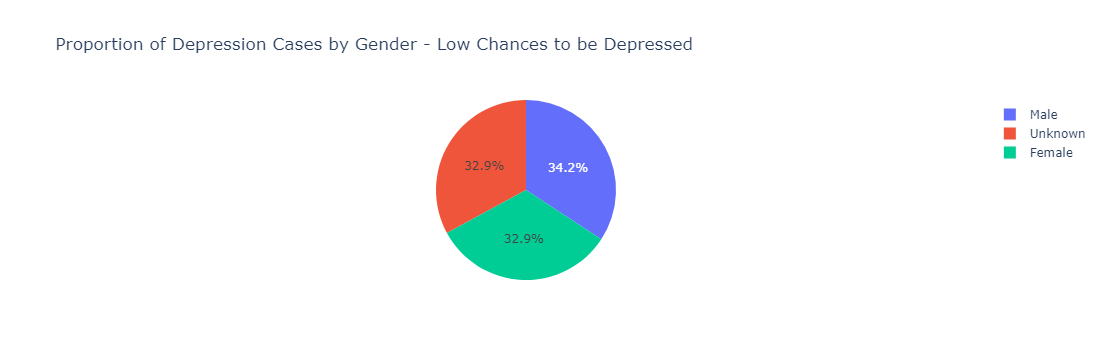

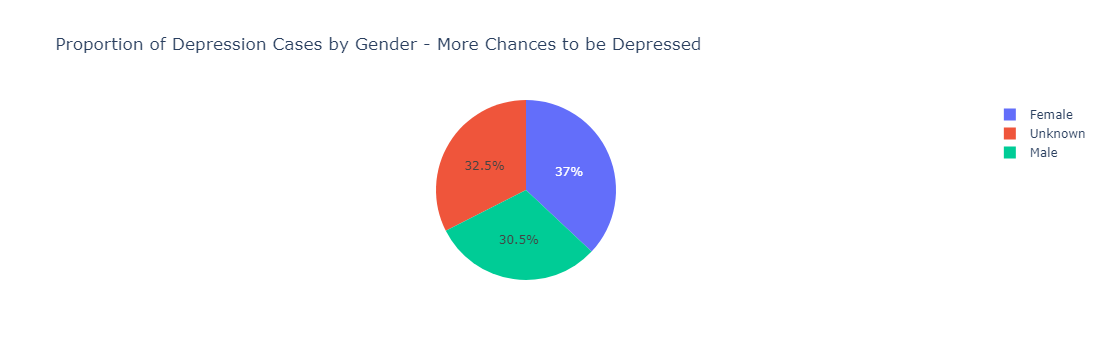

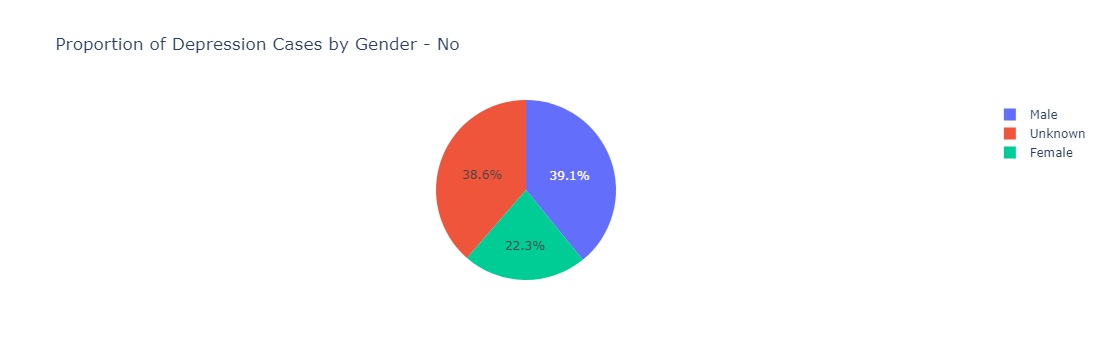

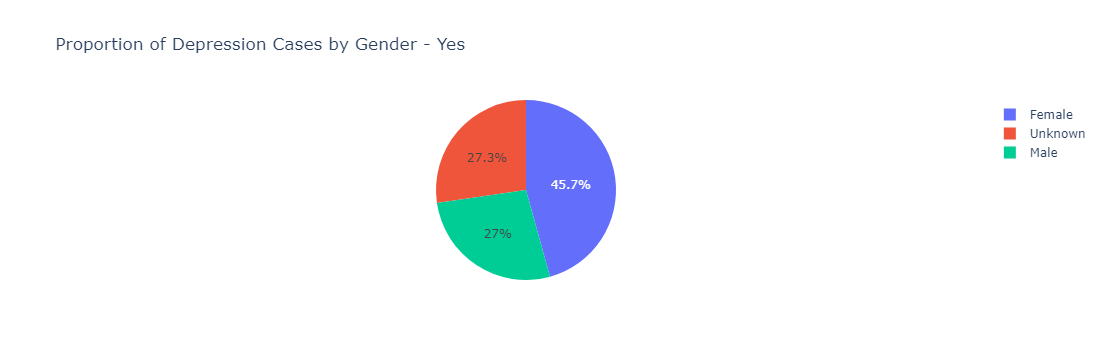

In [14]:
# Calculate proportion of depression cases by gender
gender_analysis = df.groupby('Gender',observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Gender Analysis
for status in gender_analysis.columns:
    fig = px.pie(gender_analysis, names=gender_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Gender - {status}')
    fig.show()


# Marital Status Analysis
## Marital Status Comparison

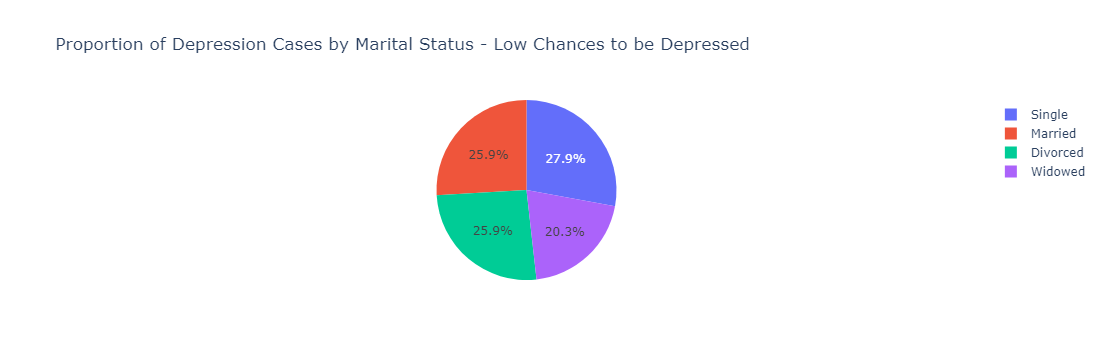

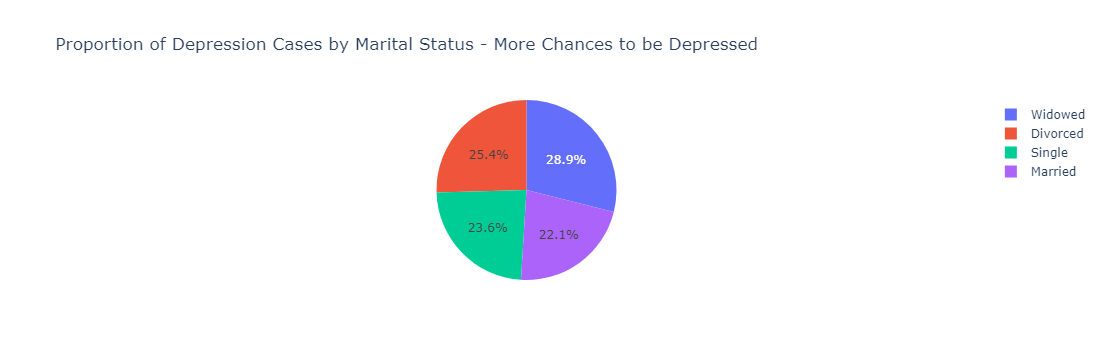

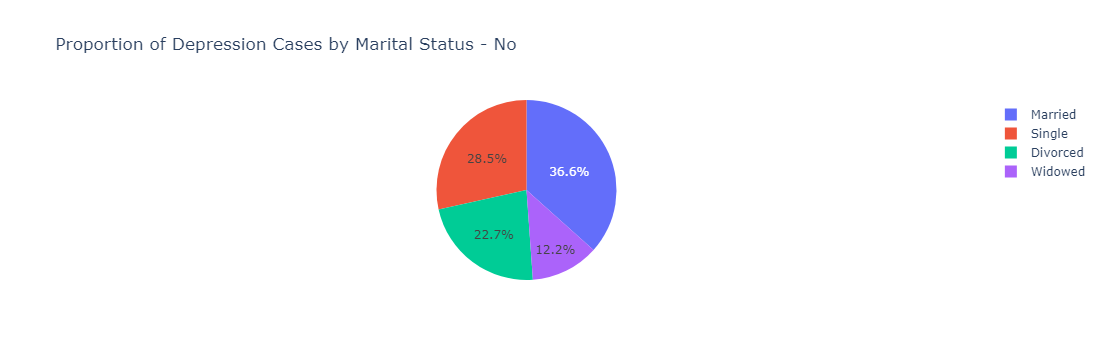

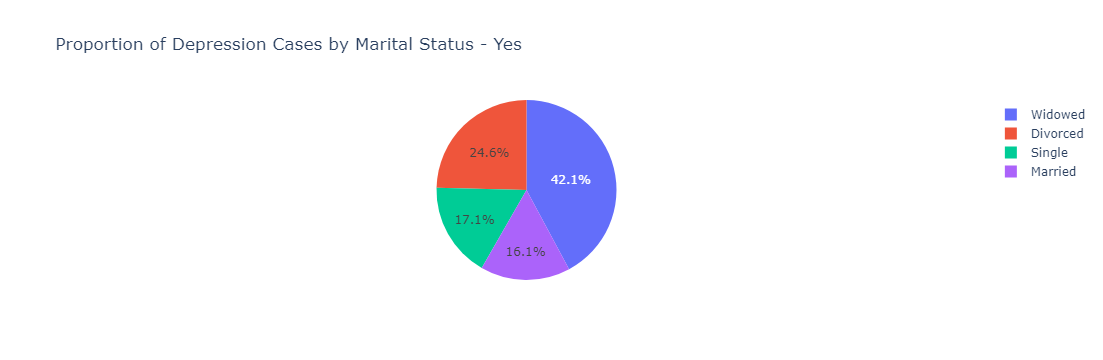

In [15]:
# Calculate proportion of depression cases by marital status
marital_status_analysis = df.groupby('Marital Status', observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Marital Status Analysis
for status in marital_status_analysis.columns:
    fig = px.pie(marital_status_analysis, names=marital_status_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Marital Status - {status}')
    fig.show()


# Income Analysis
## Income Brackets comparison

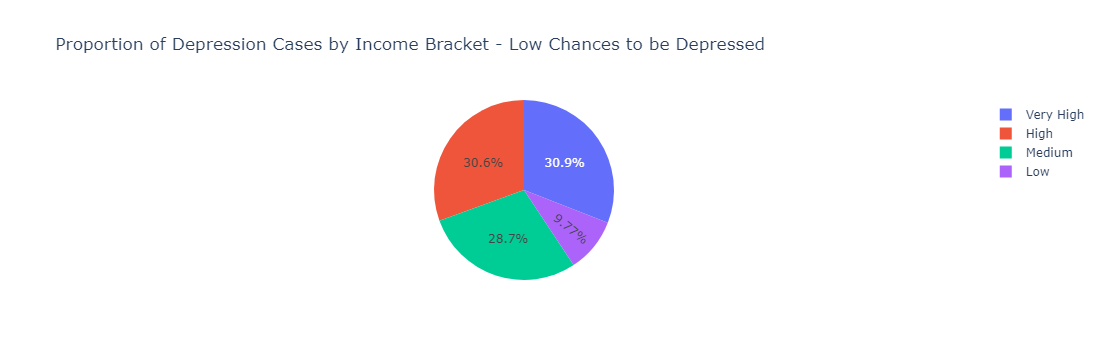

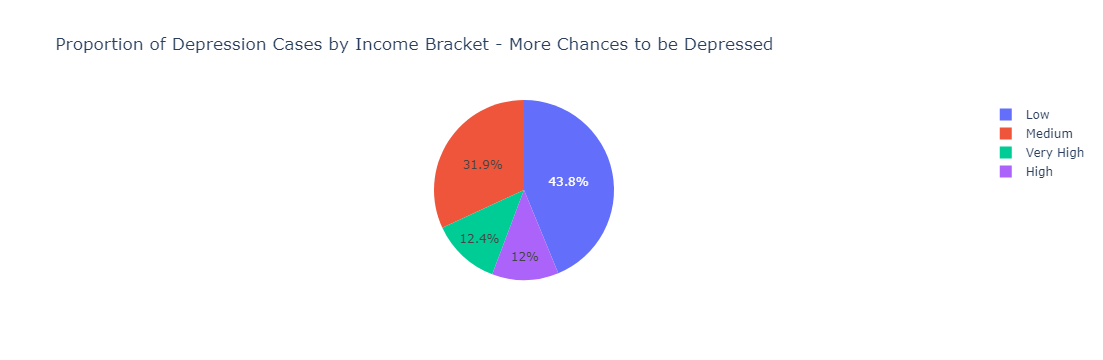

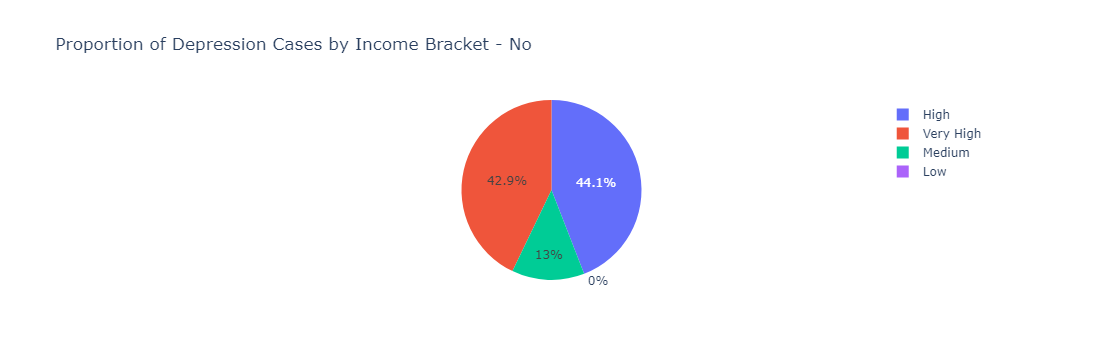

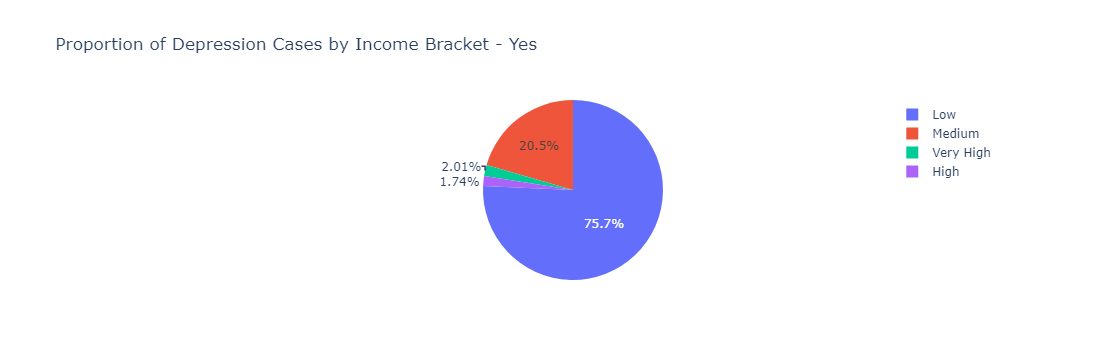

In [16]:
# Calculate proportion of depression cases by income bracket
income_analysis = df.groupby('Income Bracket' ,observed=False )['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Income Analysis
for status in income_analysis.columns:
    fig = px.pie(income_analysis, names=income_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Income Bracket - {status}')
    fig.show()

# . Education Level Analysis
## Compare Depression Risk by Education Level

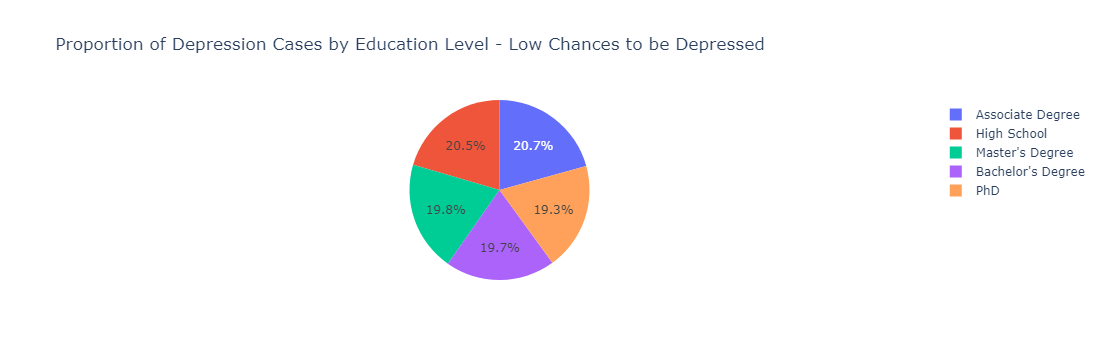

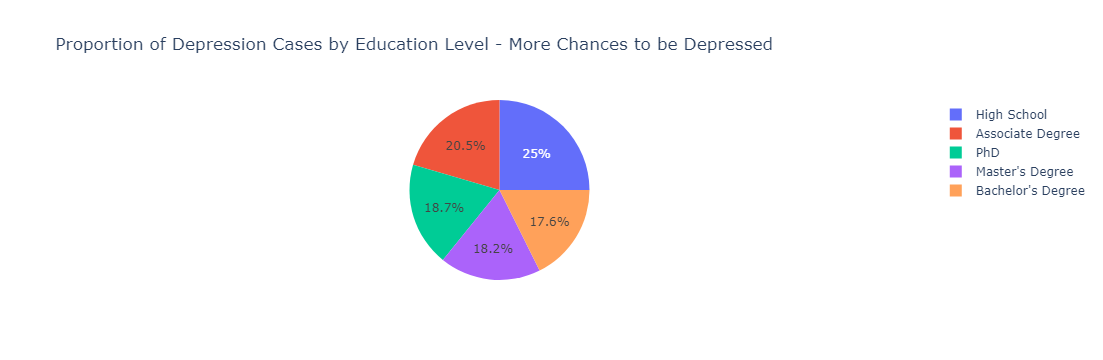

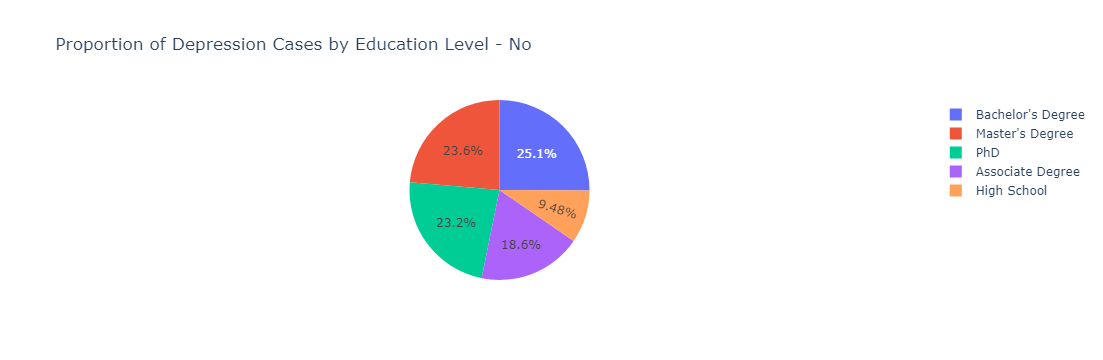

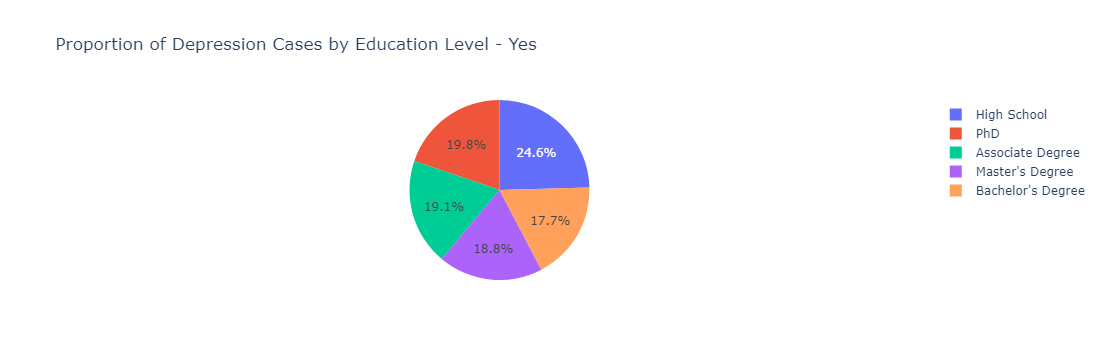

In [17]:
# Calculate proportion of depression cases by education level
education_analysis = df.groupby('Education Level', observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Education Level Analysis
for status in education_analysis.columns:
    fig = px.pie(education_analysis, names=education_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Education Level - {status}')
    fig.show()


# Employment Status Analysis
## Compare Depression Risk by Employment Status


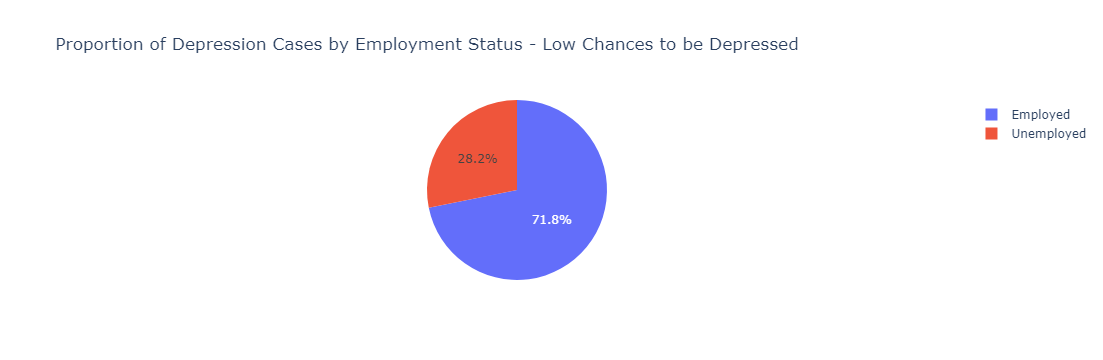

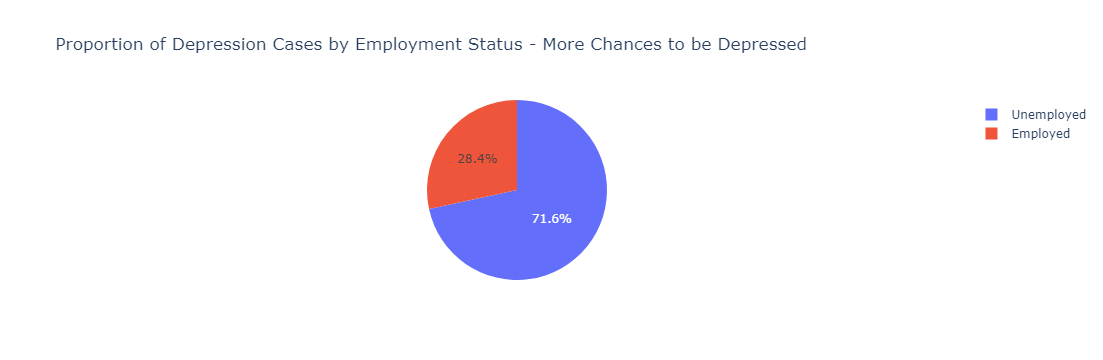

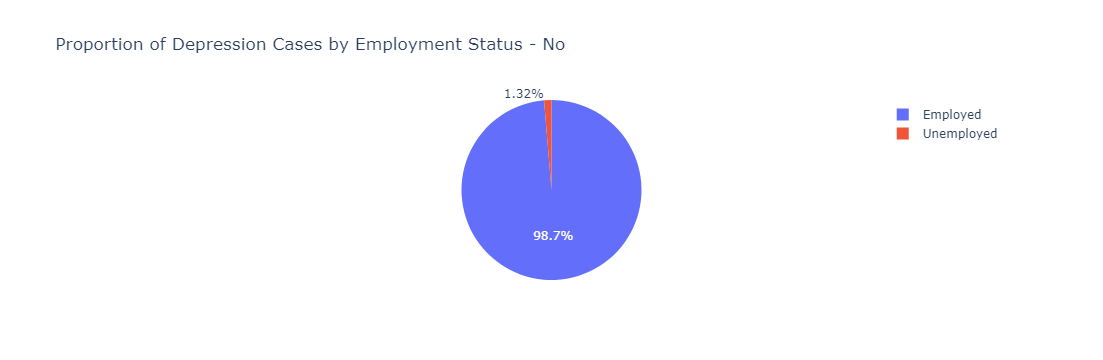

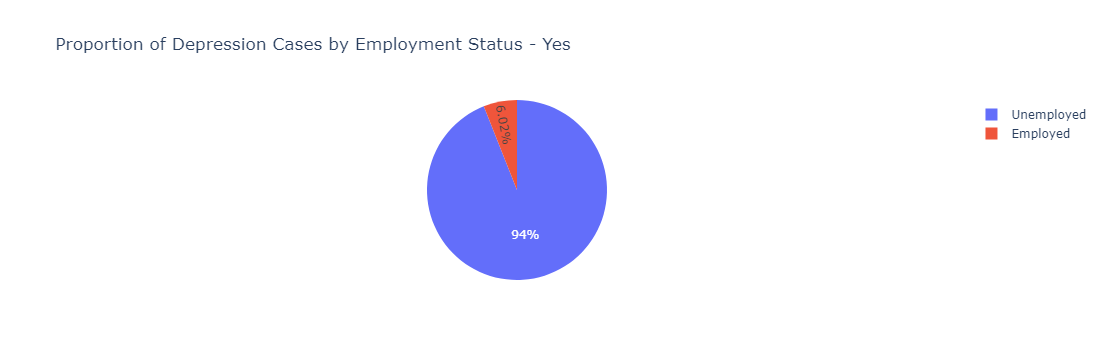

In [18]:
# Calculate proportion of depression cases by employment status
employment_analysis = df.groupby('Employment Status' ,observed=False )['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Employment Status Analysis
for status in employment_analysis.columns:
    fig = px.pie(employment_analysis, names=employment_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Employment Status - {status}')
    fig.show()


# Physical Activity and Dietary Habits Analysis

## Physical Activity Level

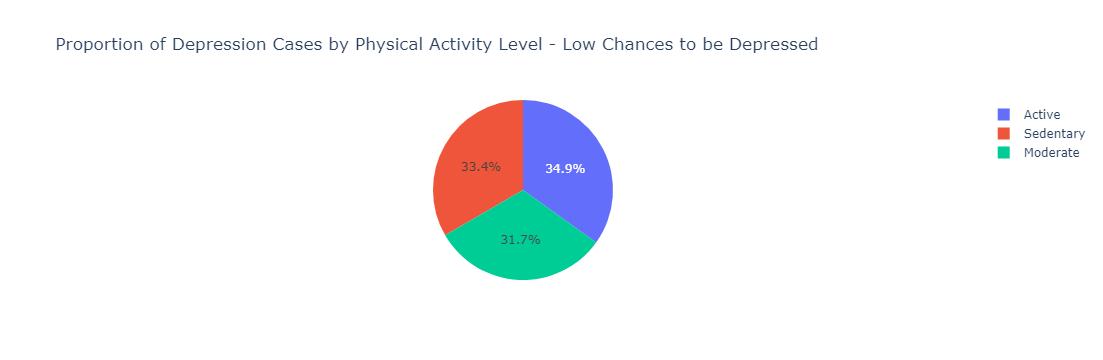

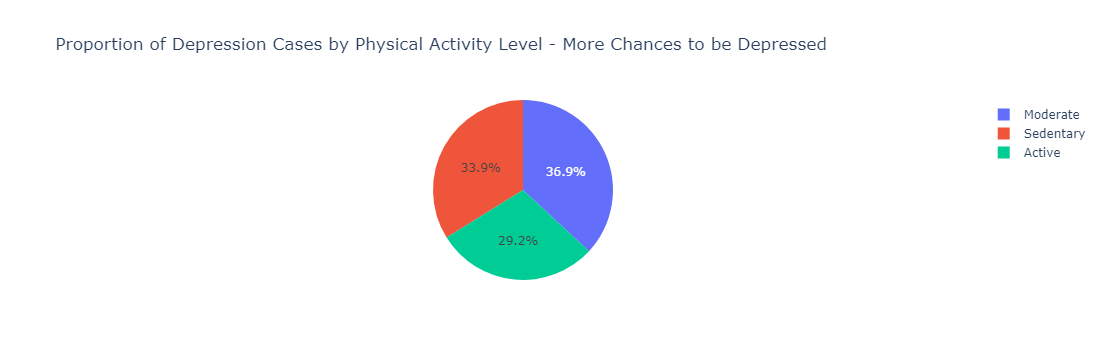

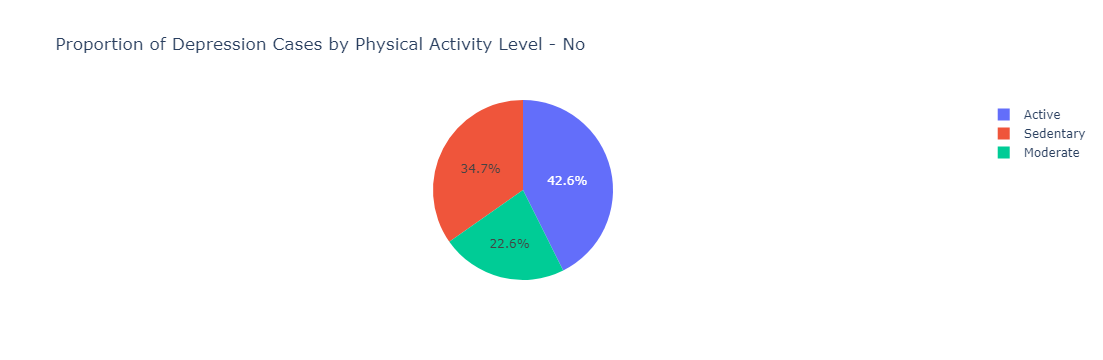

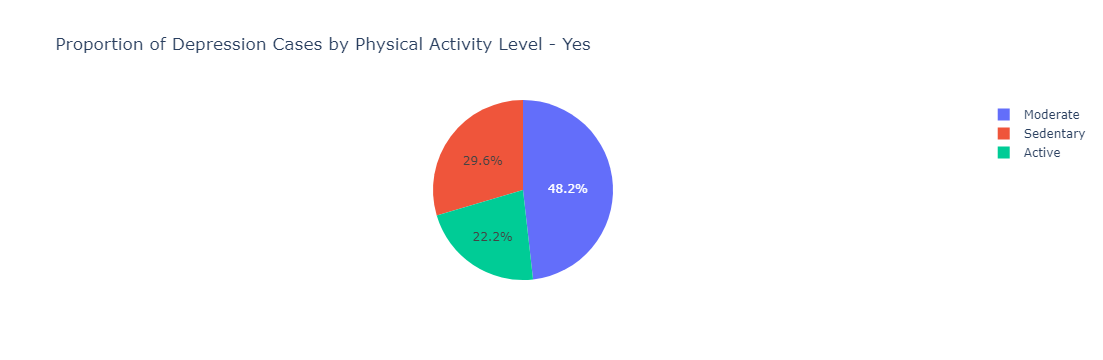

In [19]:
# Calculate proportion of depression cases by physical activity level
activity_analysis = df.groupby('Physical Activity Level', observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Physical Activity Level Analysis
for status in activity_analysis.columns:
    fig = px.pie(activity_analysis, names=activity_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Physical Activity Level - {status}')
    fig.show()


## Dietary Habits

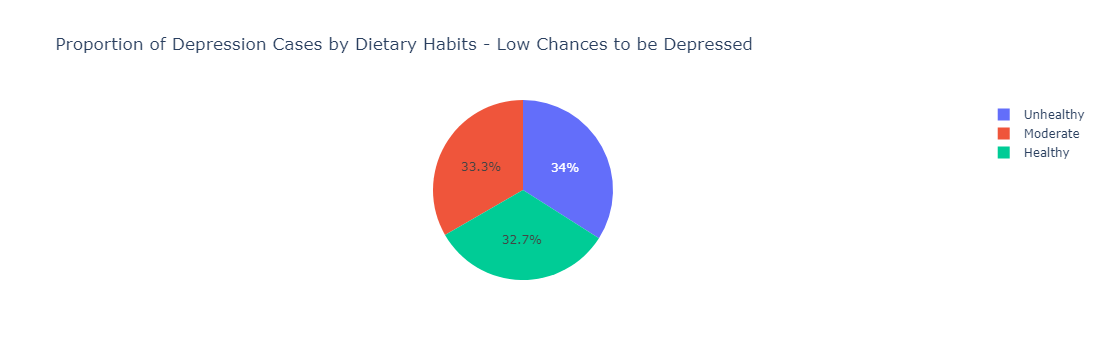

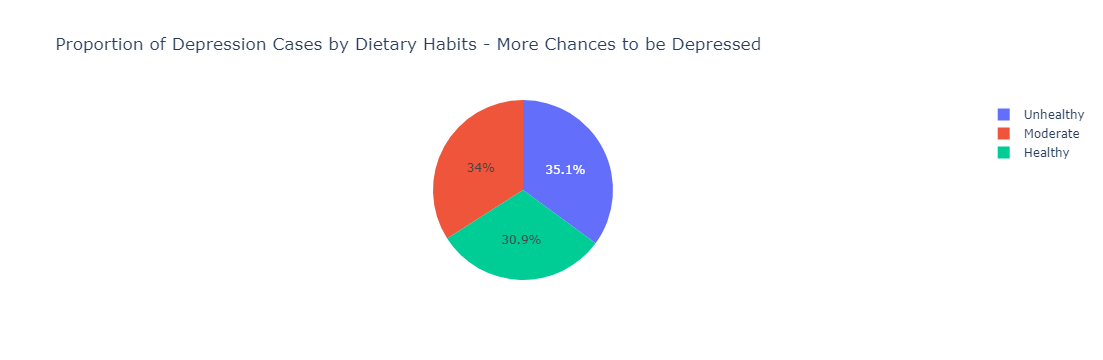

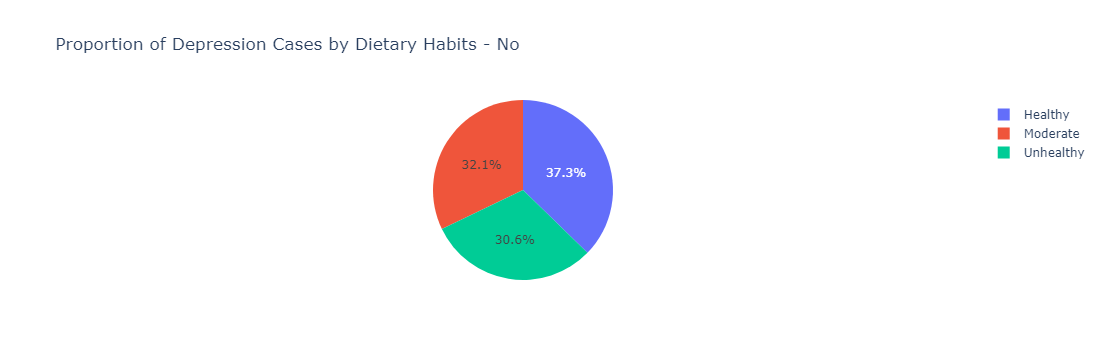

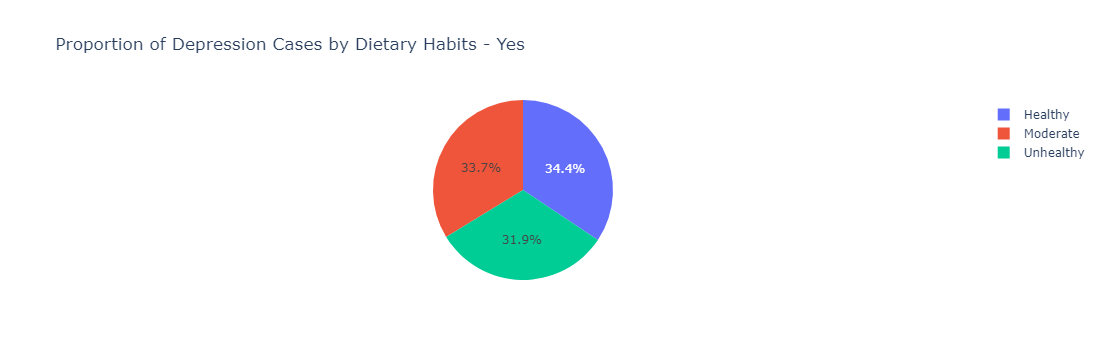

In [20]:
# Calculate proportion of depression cases by dietary habits
dietary_analysis = df.groupby('Dietary Habits' , observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Dietary Habits Analysis
for status in dietary_analysis.columns:
    fig = px.pie(dietary_analysis, names=dietary_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Dietary Habits - {status}')
    fig.show()


# Alcohol Consumption and Smoking Status Analysis

## Alcohol Consumption

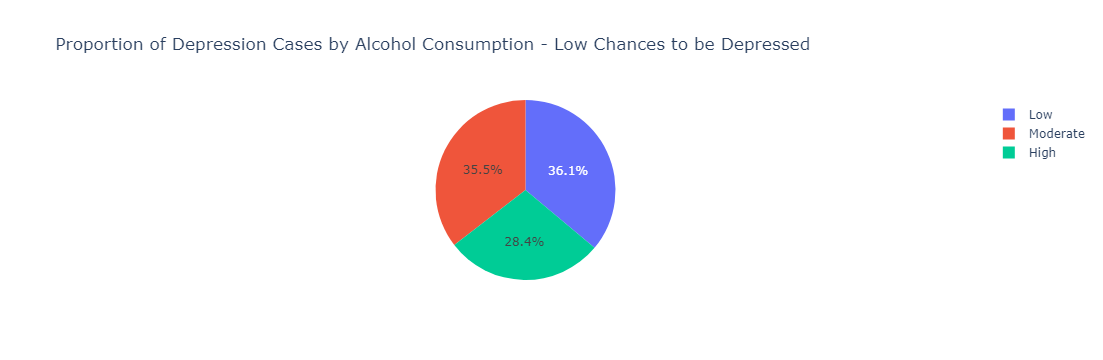

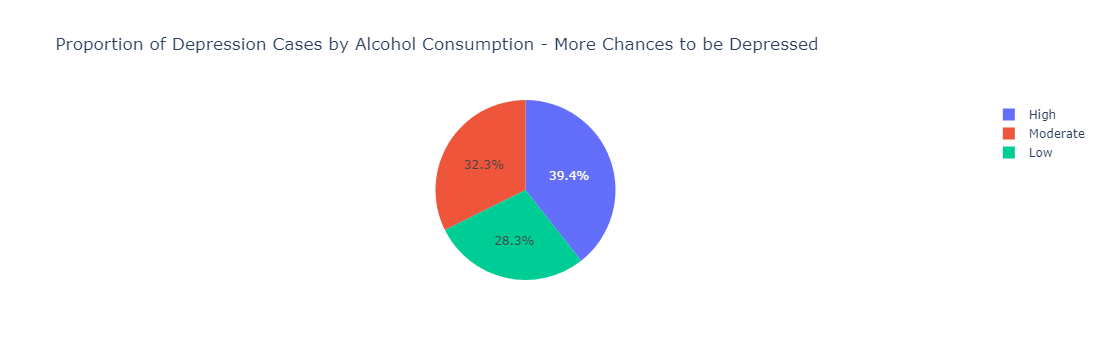

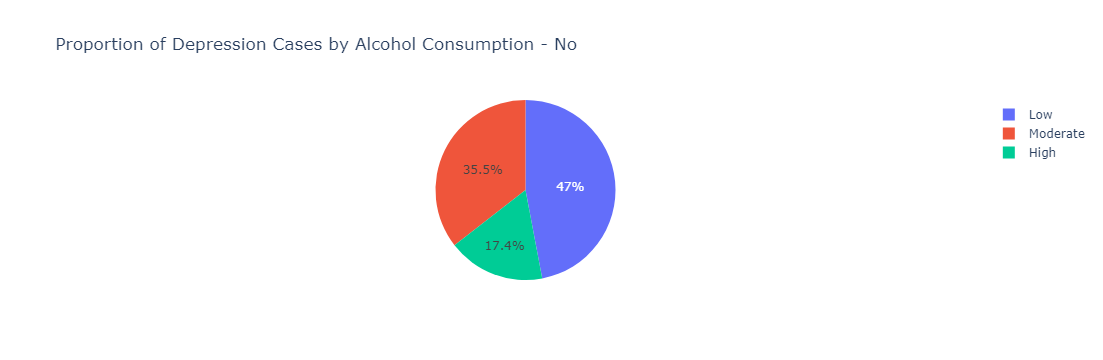

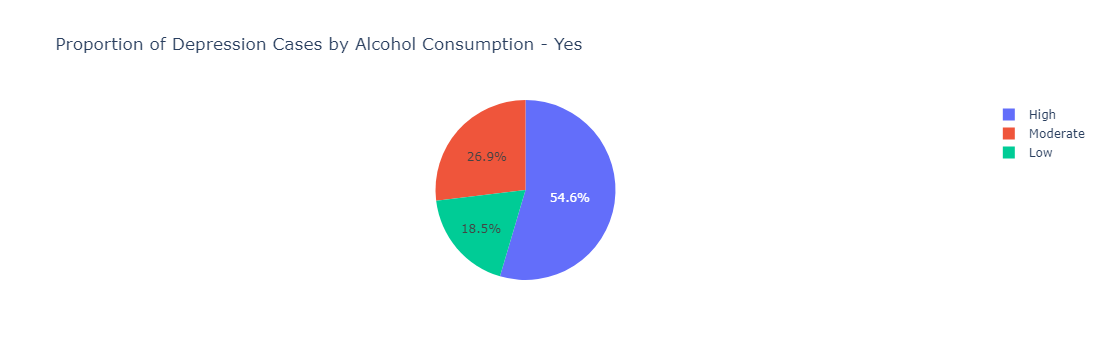

In [21]:
# Calculate proportion of depression cases by alcohol consumption
alcohol_analysis = df.groupby('Alcohol Consumption' , observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Alcohol Consumption Analysis
for status in alcohol_analysis.columns:
    fig = px.pie(alcohol_analysis, names=alcohol_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Alcohol Consumption - {status}')
    fig.show()


## Smoking Status

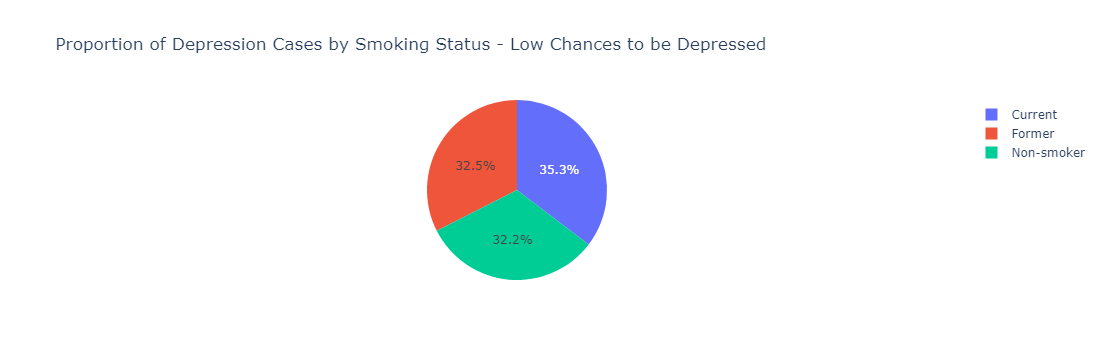

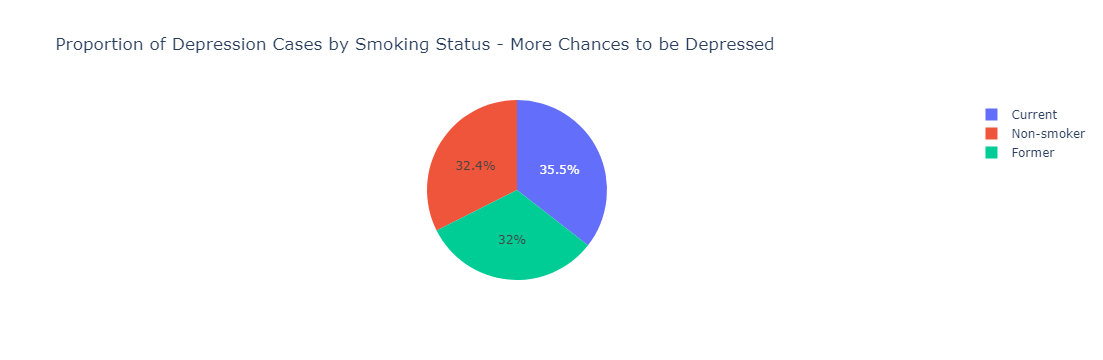

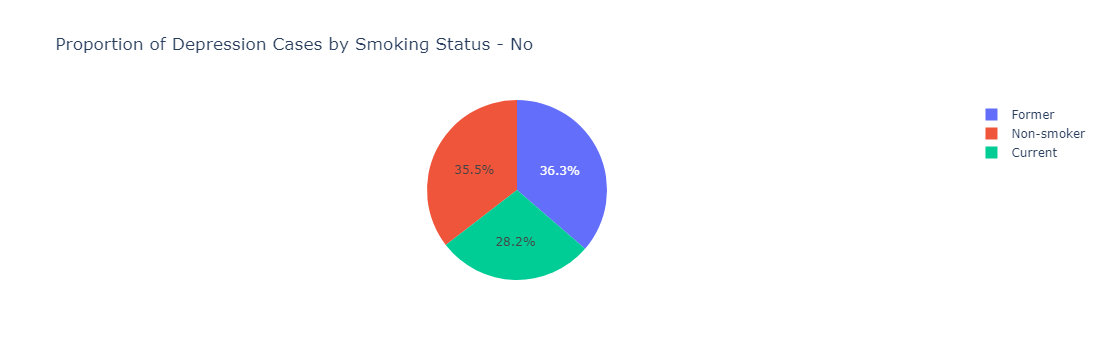

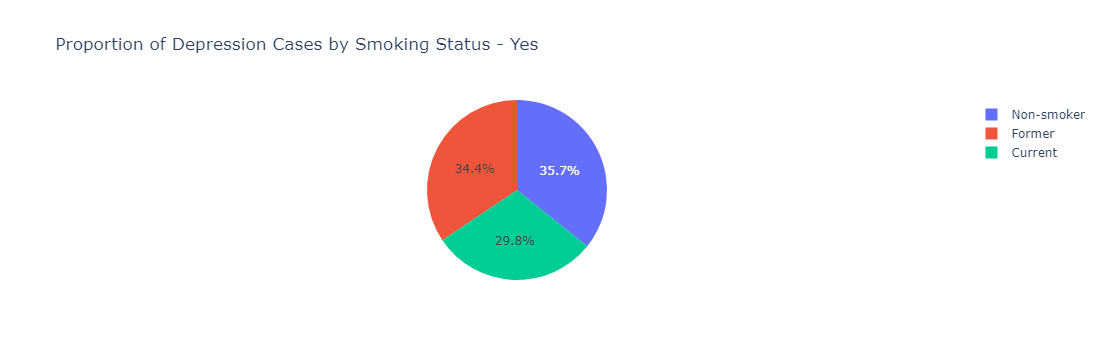

In [22]:
# Calculate proportion of depression cases by smoking status
smoking_analysis = df.groupby('Smoking Status' , observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Smoking Status Analysis
for status in smoking_analysis.columns:
    fig = px.pie(smoking_analysis, names=smoking_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Smoking Status - {status}')
    fig.show()


# Sleep Patterns and Chronic Conditions Analysis

## Sleep Patterns


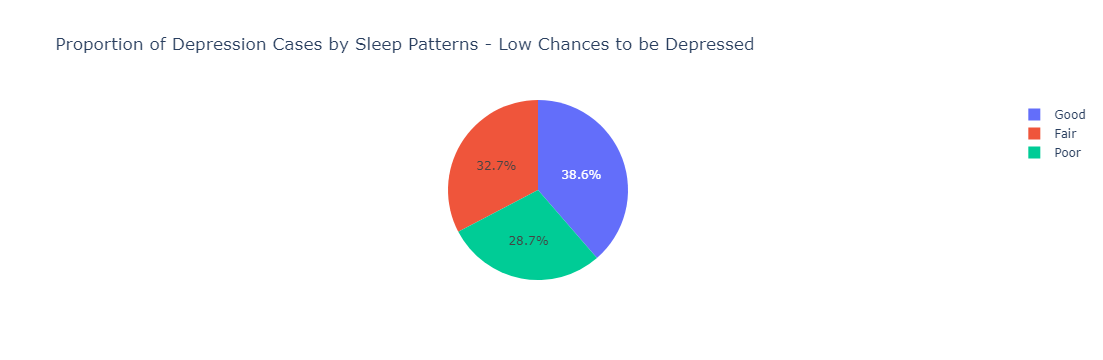

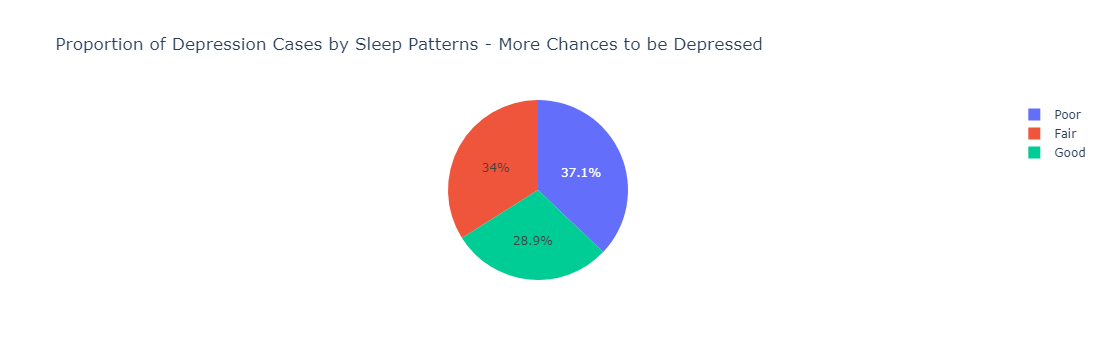

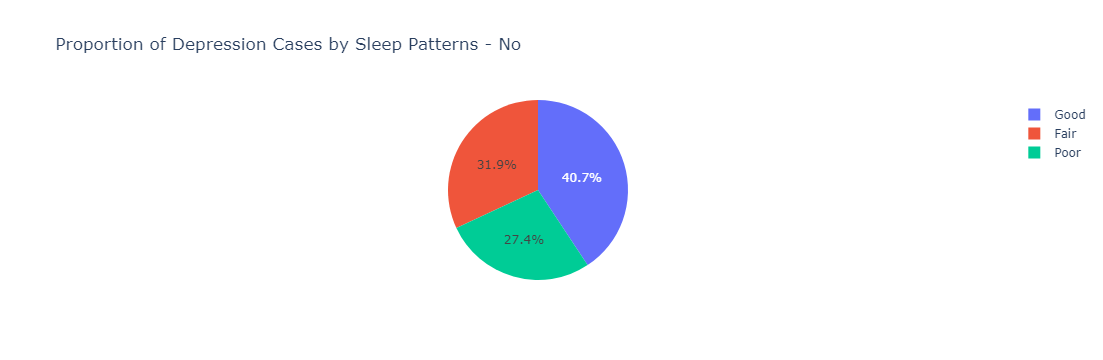

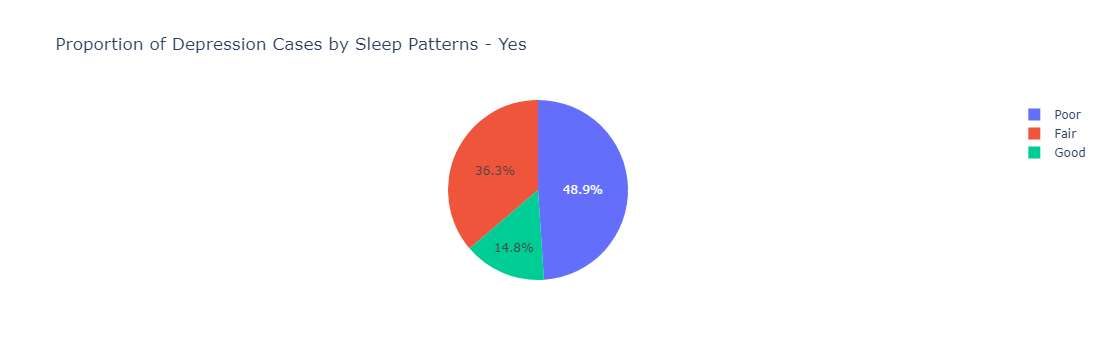

In [23]:
# Calculate proportion of depression cases by sleep patterns
sleep_analysis = df.groupby('Sleep Patterns' , observed=False )['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Sleep Patterns Analysis
for status in sleep_analysis.columns:
    fig = px.pie(sleep_analysis, names=sleep_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Sleep Patterns - {status}')
    fig.show()


## Chronic Medical Conditions

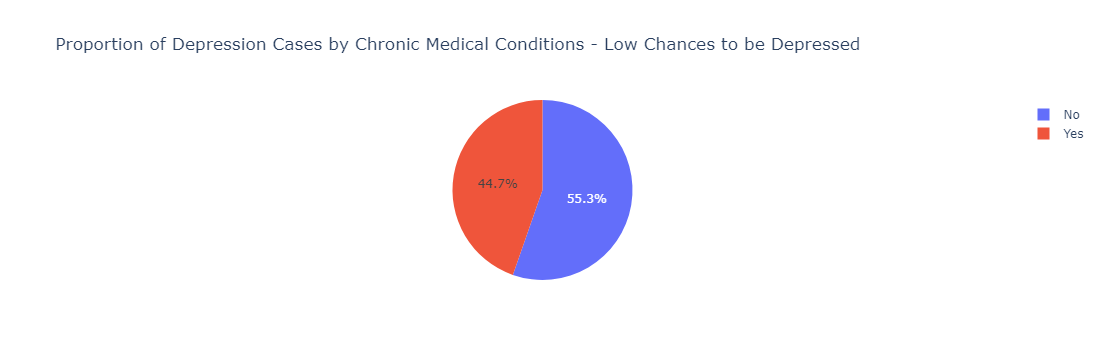

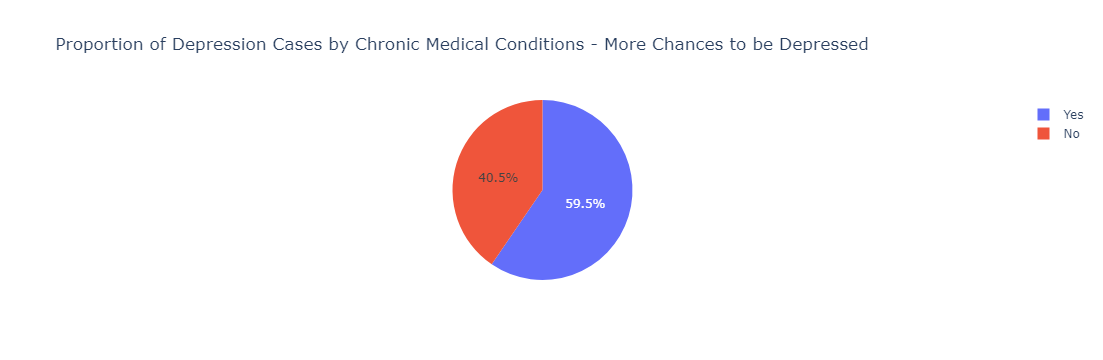

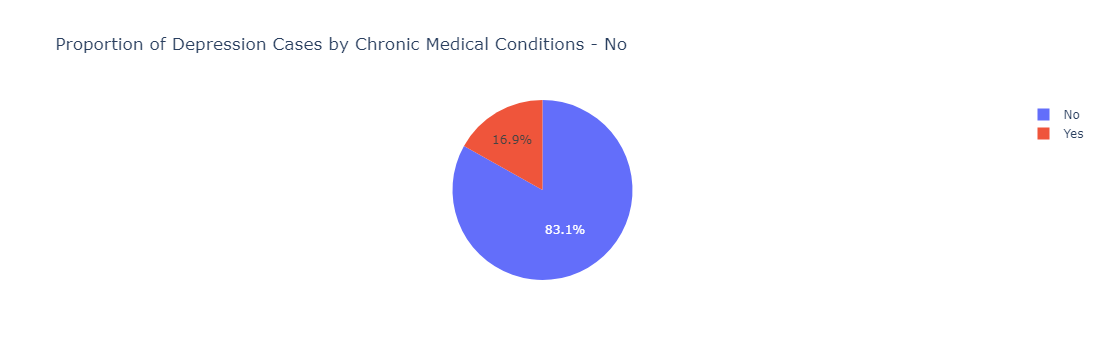

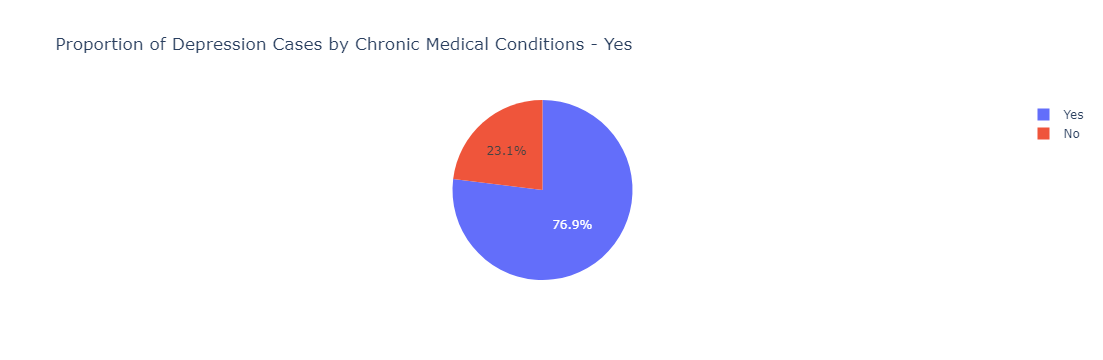

In [24]:
# Calculate proportion of depression cases by chronic medical conditions
chronic_analysis = df.groupby('Chronic Medical Conditions' , observed=False)['Depression Status'].value_counts(normalize=True).unstack().fillna(0)

# Plot Chronic Medical Conditions Analysis
for status in chronic_analysis.columns:
    fig = px.pie(chronic_analysis, names=chronic_analysis.index, values=status,
                 title=f'Proportion of Depression Cases by Chronic Medical Conditions - {status}')
    fig.show()


# THANK YOU .......... I HOPE YOU HAVE GOT THE GOOD UNDERSTANDING AND KMOWLEDGE ABOUT DEPRESSION 